2109106107

Grace Ligit Nuh

POSTTEST 7

Import library

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Link dataset
https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/

Lokasi dataset

In [2]:

train_dir = 'train'
val_dir = 'validation'
test_dir = 'test'

Data generator untuk augmentasi

In [3]:
img_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.1,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Memuat dataset gambar train dan melakukan augmentasi data

In [4]:
train_generator = img_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
    )

Found 24267 images belonging to 7 classes.


Memuat dataset gambar validation dan melakukan augmentasi data

In [5]:
val_generator = img_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 2693 images belonging to 7 classes.


Memuat dataset gambar test dan melakukan augmentasi data

In [6]:
test_generator = img_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
)

Found 28709 images belonging to 7 classes.


Membuat sequential model 

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax') 
])


Mengompilasi model

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84):
            self.model.stop_training = True

Melatih model

In [10]:
kolbek = MyCallback()
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
759/759 [==============================] - 1082s 1s/step - loss: 1.7788 - accuracy: 0.2676 - val_loss: 1.7594 - val_accuracy: 0.2755
Epoch 2/10
759/759 [==============================] - 1056s 1s/step - loss: 1.7520 - accuracy: 0.2750 - val_loss: 1.7487 - val_accuracy: 0.2822
Epoch 3/10
759/759 [==============================] - 1152s 2s/step - loss: 1.7370 - accuracy: 0.2836 - val_loss: 1.7254 - val_accuracy: 0.2930
Epoch 4/10
759/759 [==============================] - 909s 1s/step - loss: 1.7233 - accuracy: 0.2925 - val_loss: 1.7139 - val_accuracy: 0.3041
Epoch 5/10
759/759 [==============================] - 876s 1s/step - loss: 1.7040 - accuracy: 0.3093 - val_loss: 1.6907 - val_accuracy: 0.3182
Epoch 6/10
759/759 [==============================] - 810s 1s/step - loss: 1.6779 - accuracy: 0.3243 - val_loss: 1.6803 - val_accuracy: 0.3245
Epoch 7/10
759/759 [==============================] - 1025s 1s/step - loss: 1.6479 - accuracy: 0.3415 - val_loss: 1.6299 - val_accuracy: 0.

Evaluasi model terhadap data test

In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test lost: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

898/898 [==============================] - 209s 233ms/step - loss: 1.5881 - accuracy: 0.3778
Test lost: 1.5880874395370483
Test accuracy: 0.3778257668018341


Menampilkan grafik pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation 

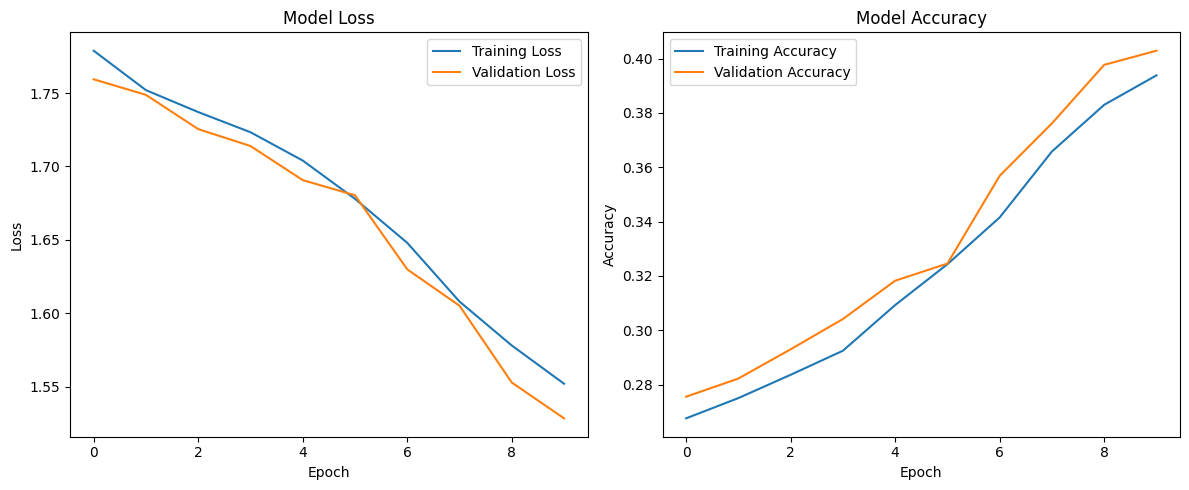

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()